# Análise Eleitoral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf

py.init_notebook_mode(connected=True)

In [8]:
consulta = pd.read_csv('consulta_cand_2016_RJ.csv', sep=';', encoding='latin-1', low_memory=False)

In [12]:
consulta_Vereador_2016 = consulta.loc[consulta['DS_CARGO'] == 'VEREADOR']

In [6]:
consulta_Vereador_2016.to_csv('consulta_Vereador_2016.csv')

In [13]:
consulta2016 = pd.DataFrame(consulta_Vereador_2016, columns= ['DS_CARGO','NM_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NM_PARTIDO','DS_GENERO',
                                                'DS_COR_RACA', 'NR_IDADE_DATA_POSSE', 'DS_GRAU_INSTRUCAO','NM_UE'])

In [ ]:
consulta

In [169]:
consultaVereador_raca = pd.DataFrame(consulta_Vereador_2016, columns = ['NM_CANDIDATO', 'NM_PARTIDO', 'DS_GENERO', 'DS_COR_RACA', 'DS_GRAU_INSTRUCAO', 
                                                 'NM_UE', 'NM_EMAIL'])

In [170]:
consultaVereador_raca_preta = consultaVereador_raca.loc[consultaVereador_raca['DS_COR_RACA'] == 'PRETA']

In [179]:
consultaVereador_raca_preta_sup =  consultaVereador_raca_preta.loc[consultaVereador_raca_preta['DS_GRAU_INSTRUCAO'] == 'SUPERIOR COMPLETO']

In [182]:
consultaVereador_raca_preta_sup.to_csv('consultaVereador_raca_preta_sup.csv')

In [5]:
consulta2016.head()

,DS_CARGO,NM_CANDIDATO,NM_SOCIAL_CANDIDATO,NM_PARTIDO,DS_GENERO,DS_COR_RACA,NR_IDADE_DATA_POSSE,DS_GRAU_INSTRUCAO,NM_UE
0,VEREADOR,JAQUELINE MACHADO VIEIRA,#NULO#,SOLIDARIEDADE,FEMININO,BRANCA,20,ENSINO MÉDIO COMPLETO,SÃO PEDRO DA ALDEIA
1,VEREADOR,MARIA DAS GRAÇAS MACHADO DUTRA DA SILVA,#NULO#,PARTIDO REPUBLICANO BRASILEIRO,FEMININO,BRANCA,47,ENSINO MÉDIO COMPLETO,BOM JARDIM
2,VEREADOR,MANOEL IVAN BEZERRA PEREIRA,#NULO#,PARTIDO ECOLÓGICO NACIONAL,MASCULINO,BRANCA,64,SUPERIOR COMPLETO,RESENDE
3,VEREADOR,ALBERTO DOS REIS,#NULO#,PARTIDO DA MULHER BRASILEIRA,MASCULINO,PARDA,64,ENSINO MÉDIO COMPLETO,SÃO GONÇALO
4,VEREADOR,EDIANA LÚCIA FRANCISCA CHAGAS,#NULO#,PARTIDO PÁTRIA LIVRE,FEMININO,PRETA,54,LÊ E ESCREVE,QUISSAMÃ


In [47]:
consulta2016.nunique()

DS_CARGO                   1
NM_CANDIDATO           21227
NM_SOCIAL_CANDIDATO        1
NM_PARTIDO                35
DS_GENERO                  2
DS_COR_RACA                5
NR_IDADE_DATA_POSSE       72
DS_GRAU_INSTRUCAO          7
NM_UE                     92
dtype: int64

In [7]:
consulta2016['DS_CARGO'].value_counts()

VEREADOR    21395
Name: DS_CARGO, dtype: int64

In [14]:
consultaVereador = consulta2016.loc[consulta2016['DS_CARGO'] == 'VEREADOR']

In [9]:
consultaVereador.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21395 entries, 0 to 21394
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DS_CARGO             21395 non-null  object
 1   NM_CANDIDATO         21395 non-null  object
 2   NM_SOCIAL_CANDIDATO  21395 non-null  object
 3   NM_PARTIDO           21395 non-null  object
 4   DS_GENERO            21395 non-null  object
 5   DS_COR_RACA          21395 non-null  object
 6   NR_IDADE_DATA_POSSE  21395 non-null  int64 
 7   DS_GRAU_INSTRUCAO    21395 non-null  object
 8   NM_UE                21395 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


In [39]:
consultaVereador.to_csv('consultaVereador_RJ_2016.csv')

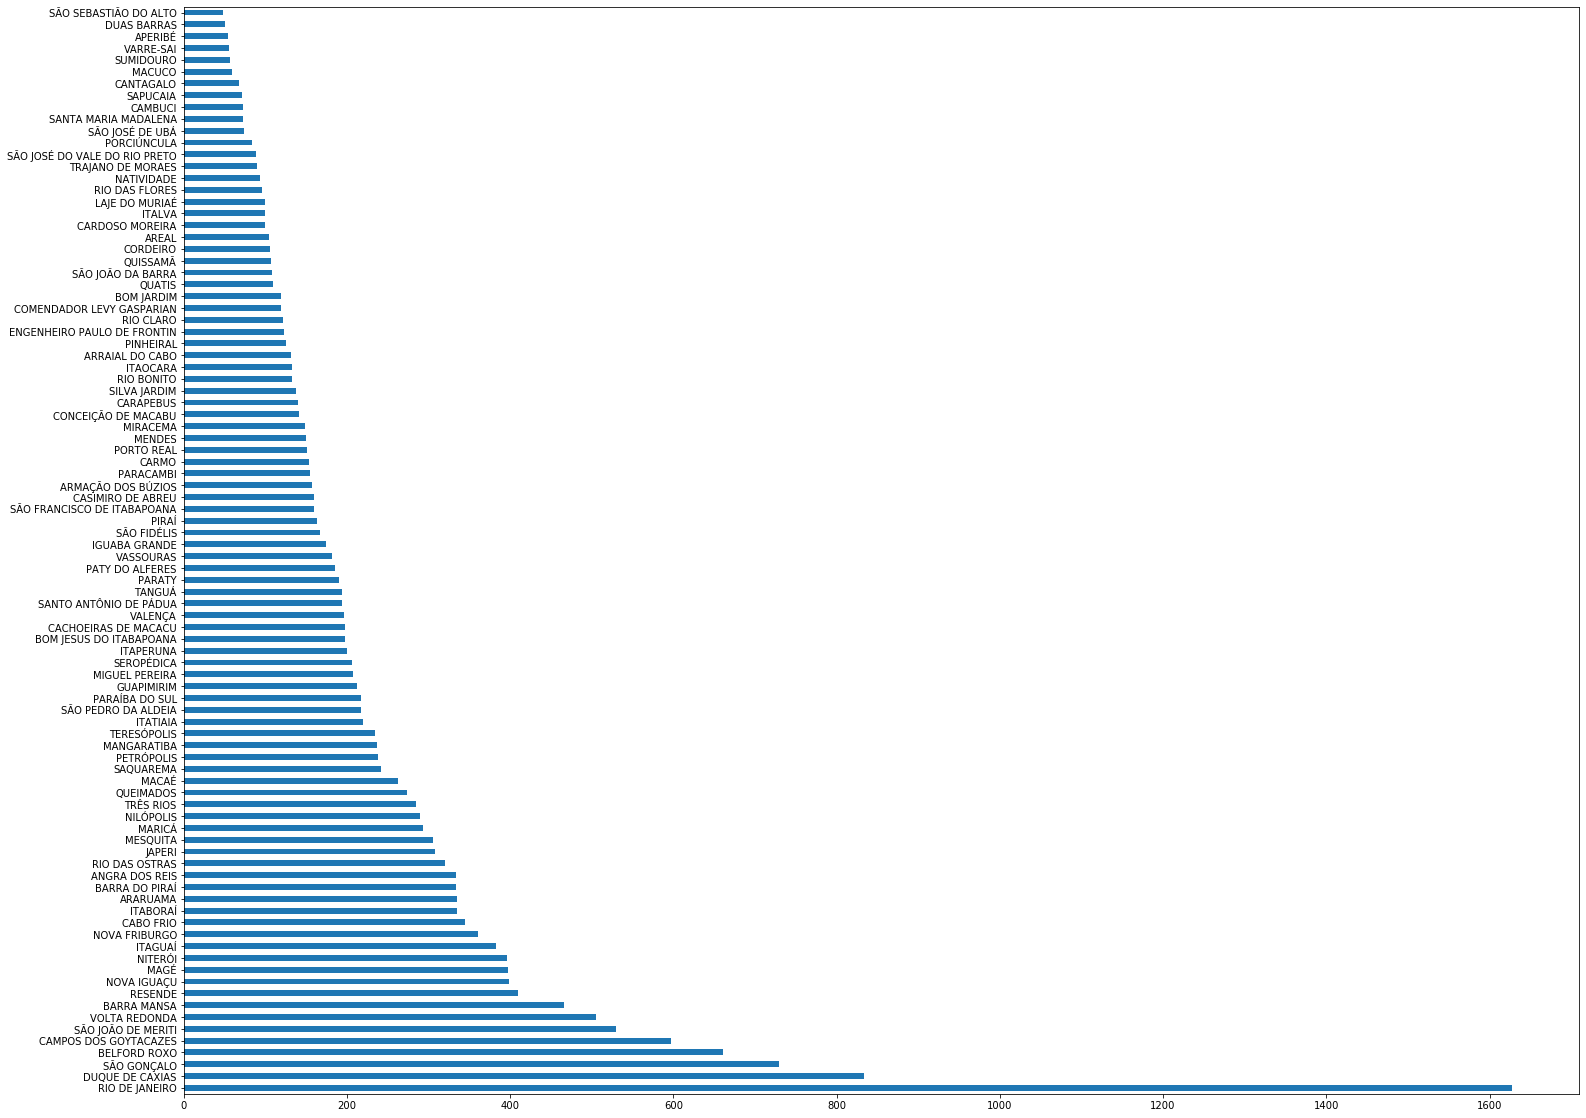

In [10]:
#Locais de votação
consultaVereador['NM_UE'].value_counts().plot(kind='barh', figsize=(25,20))

 - Candidatura de homens e mulheres a vereador no Rio Janeiro

In [11]:
# Há muito mais homens se candidatando ao cargo de vereador
consultaVereador['DS_GENERO'].value_counts()*100/21395

MASCULINO    67.599907
FEMININO     32.400093
Name: DS_GENERO, dtype: float64

In [12]:
consultaVereador['DS_GENERO'].value_counts()

MASCULINO    14463
FEMININO      6932
Name: DS_GENERO, dtype: int64

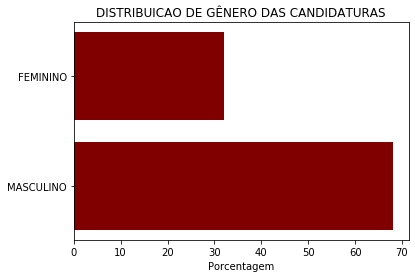

In [13]:
y = [68, 32]
x = ['MASCULINO', 'FEMININO']
plt.barh(x, y, color='maroon',)
plt.title('DISTRIBUICAO DE GÊNERO DAS CANDIDATURAS')
plt.xlabel('Porcentagem')
plt.show()

 - Distribuição racial de candidatura

In [14]:
consultaVereador['DS_COR_RACA'].value_counts()

BRANCA      11712
PARDA        6459
PRETA        3143
AMARELA        55
INDÍGENA       26
Name: DS_COR_RACA, dtype: int64

In [15]:
consultaVereador['DS_COR_RACA'].describe()

count      21395
unique         5
top       BRANCA
freq       11712
Name: DS_COR_RACA, dtype: object

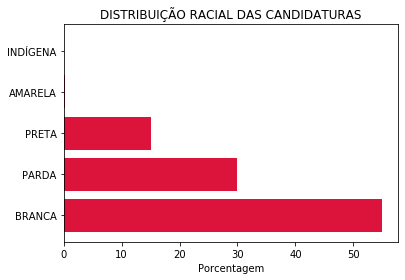

In [16]:
y = [55, 30, 15, 0.3, 0.1]
x = ['BRANCA', 'PARDA', 'PRETA', 'AMARELA', 'INDÍGENA' ]
plt.barh(x, y, color='crimson')
plt.title('DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS')
plt.xlabel('Porcentagem')
plt.show()

- Distribuição de Idade da candidaturas

In [17]:
consultaVereador['NR_IDADE_DATA_POSSE'].describe()

count    21395.000000
mean        46.330311
std         11.300870
min         18.000000
25%         38.000000
50%         46.000000
75%         54.000000
max         93.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [18]:
idade1 = consultaVereador['NR_IDADE_DATA_POSSE'].loc[consultaVereador['NR_IDADE_DATA_POSSE'] <= 38].value_counts().sum()*100/21395


In [19]:
idade2 = consultaVereador['NR_IDADE_DATA_POSSE'].loc[(consultaVereador['NR_IDADE_DATA_POSSE'] > 38)  & (consultaVereador['NR_IDADE_DATA_POSSE'] <= 58)].value_counts().sum()*100/21395



In [20]:
idade3 = consultaVereador['NR_IDADE_DATA_POSSE'].loc[(consultaVereador['NR_IDADE_DATA_POSSE'] > 58)  & (consultaVereador['NR_IDADE_DATA_POSSE'] <= 79)].value_counts().sum()*100/21395



In [21]:
idade4 = consultaVereador['NR_IDADE_DATA_POSSE'].loc[consultaVereador['NR_IDADE_DATA_POSSE'] >= 80].value_counts().sum()*100/21395



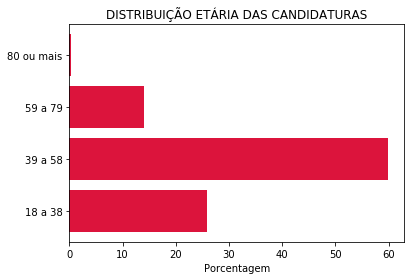

In [22]:
y = [idade1, idade2, idade3, idade4]
x = ['18 a 38', '39 a 58', '59 a 79', '80 ou mais']
plt.barh(x, y, color='crimson')
plt.title('DISTRIBUIÇÃO ETÁRIA DAS CANDIDATURAS')
plt.xlabel('Porcentagem')
plt.show()

- Partidos por canditatura

In [23]:
# 35 partidos
consultaVereador['NM_PARTIDO'].nunique()

35

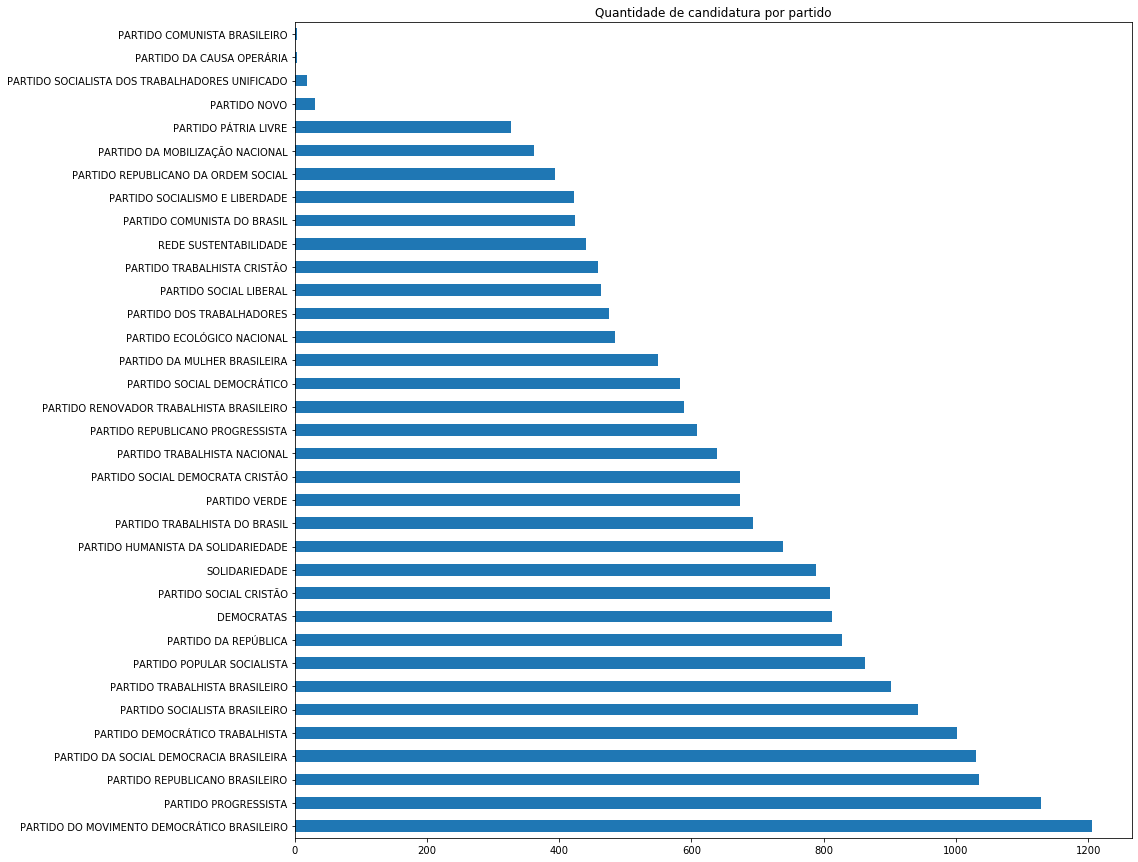

In [24]:
#Distribuição dos partidos
consultaVereador['NM_PARTIDO'].value_counts().plot(kind='barh', figsize=(15,15), title='Quantidade de candidatura por partido')

- Grau de instrução dos candidatos

In [25]:
consultaVereador['DS_GRAU_INSTRUCAO'].value_counts()*100/21395

ENSINO MÉDIO COMPLETO            41.939706
SUPERIOR COMPLETO                20.401963
ENSINO FUNDAMENTAL COMPLETO      12.858144
ENSINO FUNDAMENTAL INCOMPLETO    12.741295
ENSINO MÉDIO INCOMPLETO           5.926618
SUPERIOR INCOMPLETO               5.328348
LÊ E ESCREVE                      0.803926
Name: DS_GRAU_INSTRUCAO, dtype: float64

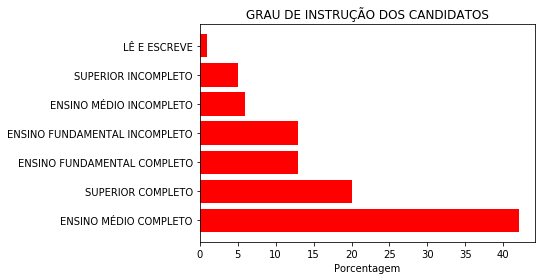

In [26]:
y = [42, 20,13, 13, 6, 5, 1]
x = ['ENSINO MÉDIO COMPLETO', 'SUPERIOR COMPLETO', 'ENSINO FUNDAMENTAL COMPLETO', 'ENSINO FUNDAMENTAL INCOMPLETO',
        'ENSINO MÉDIO INCOMPLETO', 'SUPERIOR INCOMPLETO', 'LÊ E ESCREVE']
plt.barh(x, y, color='red')
plt.title('GRAU DE INSTRUÇÃO DOS CANDIDATOS')
plt.xlabel('Porcentagem')
plt.show()

- Apontamentos 

In [27]:
# PARTIDO COMUNISTA BRASILEIRO e PARTIDO NOVO não possui nenhuma candidatura de pessoas declaradas pretas
# Partido Republicano Brasileiro é o que possui maior número de candituras de pessoas declaradas pretas
preta = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'PRETA').groupby(consultaVereador['NM_PARTIDO']).count()

In [28]:
# PARTIDO COMUNISTA BRASILEIRO, PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO e PARTIDO DA CAUSA OPERÁRIA apenas 1 candidatura de pessoas declaradas pardas
# O partido com mais candidaturas de pessoas declaradas pardas é o PARTIDO REPUBLICANO BRASILEIRO
parda = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'PARDA').groupby(consultaVereador['NM_PARTIDO']).count()

In [29]:
# Os partidos com menor candidatura de pessoas declaradas brancas é o Partido Comunista Brasileiro e Partido da Causa Operária
# O partido com maior número de candidaturas de pessoas declaradas brancas é o PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO
branca = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'BRANCA').groupby(consultaVereador['NM_PARTIDO']).count()

In [30]:
# O Parido que possui maior número de candidaturas de pessoas declaradas amarelas é o PARTIDO DA MULHER BRASILEIRA
amarela = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'AMARELA').groupby(consultaVereador['NM_PARTIDO']).count()

In [31]:
#  O partido com maior número de candidatos declarados indígenas é PARTIDO SOCIAL DEMOCRATA CRISTÃO e SOLIDARIEDADE
indigena = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'INDÍGENA').groupby(consultaVereador['NM_PARTIDO']).count()

 - Criando gráfico

In [15]:
# Criando variavel a partir do dataframe
partidos = consultaVereador['NM_PARTIDO']

In [16]:
# transformando a variaveis em uma lista
partidos.tolist()

['SOLIDARIEDADE',
 'PARTIDO REPUBLICANO BRASILEIRO',
 'PARTIDO ECOLÓGICO NACIONAL',
 'PARTIDO DA MULHER BRASILEIRA',
 'PARTIDO PÁTRIA LIVRE',
 'PARTIDO DA MULHER BRASILEIRA',
 'PARTIDO REPUBLICANO BRASILEIRO',
 'PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA',
 'PARTIDO REPUBLICANO PROGRESSISTA',
 'PARTIDO POPULAR SOCIALISTA',
 'PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA',
 'PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO',
 'PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA',
 'PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA',
 'PARTIDO DOS TRABALHADORES',
 'PARTIDO POPULAR SOCIALISTA',
 'PARTIDO DEMOCRÁTICO TRABALHISTA',
 'PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO',
 'PARTIDO REPUBLICANO PROGRESSISTA',
 'PARTIDO SOCIAL DEMOCRÁTICO',
 'PARTIDO HUMANISTA DA SOLIDARIEDADE',
 'PARTIDO VERDE',
 'PARTIDO VERDE',
 'PARTIDO SOCIALISTA BRASILEIRO',
 'PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA',
 'DEMOCRATAS',
 'PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO',
 'PARTIDO SOCIAL DEMOCRATA CRISTÃO',
 'PARTIDO TRABALHISTA CRISTÃO',


In [17]:
# Ordenando a lista
partidos = sorted(set(partidos))

In [35]:
# Criando um dicionário para criar um novo DataFrame
dic = {'PARTIDOS': partidos, 'PRETA': preta['DS_COR_RACA'], 'PARDA': parda['DS_COR_RACA'], 'BRANCA': branca['DS_COR_RACA'], 'AMARELA': amarela['DS_COR_RACA'], 'INDÍGENA': indigena['DS_COR_RACA']}

In [37]:
# Criando um novo data frame
df_raca = pd.DataFrame(dic)

In [38]:
# Excluindo coluna que não é de interesse
df_raca.drop(['PARTIDOS'], axis=1, inplace=True)

In [462]:
# Salvando o data frame em uma arquivo csv
df_raca.to_csv('df_raca.csv')

In [40]:
# Criando uma nova coluna 
df_raca['TOTAL'] = df_raca['PRETA'] + df_raca['PARDA'] + df_raca['BRANCA'] + df_raca['AMARELA'] + df_raca['INDÍGENA']

In [460]:
df_raca['PRETA'] = xPreta
df_raca['PARDA'] = xPardas
df_raca['BRANCA'] = xBranca
df_raca['AMARELA'] = xAmarela
df_raca['INDÍGENA'] =xIndigena

In [466]:
df2_raca = df_raca.sort_values(['TOTAL'])

In [468]:
df2_raca.to_csv('partido_raca.csv')

In [41]:
# Criando variaveis do gráfico

xPreta = df_raca['PRETA']*100 / df_raca['TOTAL']
xBranca =  df_raca['BRANCA']*100/ df_raca['TOTAL']
xPardas = df_raca['PARDA']*100 / df_raca['TOTAL']
xAmarela = df_raca['AMARELA']*100 / df_raca['TOTAL']
xIndigena = df_raca['INDÍGENA']*100 / df_raca['TOTAL']

In [42]:
# Arredondando a porcentagem
decimais = 1
xIndigena = xIndigena.apply(lambda x: round(x, decimais))
xPreta = xPreta.apply(lambda x: round(x, decimais))
xBranca = xBranca.apply(lambda x: round(x, decimais))
xAmarela = xAmarela.apply(lambda x: round(x, decimais))
xPardas = xPardas.apply(lambda x: round(x, decimais))

In [472]:
# Gráfico Distribuição racial
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[0:10],
                x = xPreta[0:10],
                name = 'PRETA',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[0:10],
                x = xPardas[0:10],
                name = 'PARDA',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[0:10],
                x = xBranca[0:10] ,
                name = 'BRANCA',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[0:10],
                x = xIndigena[0:10],
                name = 'INDÍGENA',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[0:10],
                x = xAmarela[0:10],
                name = 'AMARELA',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [473]:
# Gráfico Distribuição racial
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[11:21],
                x = xPreta[11:21],
                name = 'PRETA',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[11:21],
                x = xPardas[11:21],
                name = 'PARDA',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[11:21],
                x = xBranca[11:21] ,
                name = 'BRANCA',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[11:21],
                x = xIndigena[11:21],
                name = 'INDÍGENA',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[11:21],
                x = xAmarela[11:21],
                name = 'AMARELA',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [475]:
# Gráfico Distribuição racial
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[22:36],
                x = xPreta[22:36],
                name = 'PRETA',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[22:36],
                x = xPardas[22:36],
                name = 'PARDA',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[22:36],
                x = xBranca[22:36] ,
                name = 'BRANCA',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[22:36],
                x = xIndigena[22:36],
                name = 'INDÍGENA',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[22:36],
                x = xAmarela[22:36],
                name = 'AMARELA',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 10,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

 Distribuição Etária por partido

In [46]:
xIdade1 = consultaVereador.filter(items=['NR_IDADE_DATA_POSSE']).where(consultaVereador['NR_IDADE_DATA_POSSE'] <= 38).groupby(consultaVereador['NM_PARTIDO']).count()
xIdade2 = consultaVereador.filter(items=['NR_IDADE_DATA_POSSE']).where((consultaVereador['NR_IDADE_DATA_POSSE'] > 38)  & (consultaVereador['NR_IDADE_DATA_POSSE'] <= 58)).groupby(consultaVereador['NM_PARTIDO']).count()
xIdade3 = consultaVereador.filter(items=['NR_IDADE_DATA_POSSE']).where((consultaVereador['NR_IDADE_DATA_POSSE'] > 58)  & (consultaVereador['NR_IDADE_DATA_POSSE'] <= 79)).groupby(consultaVereador['NM_PARTIDO']).count()
xIdade4 = consultaVereador.filter(items=['NR_IDADE_DATA_POSSE']).where(consultaVereador['NR_IDADE_DATA_POSSE'] >= 80).groupby(consultaVereador['NM_PARTIDO']).count()

In [47]:
# Partido da Social Democracia Brasileria é o partido com maior numero de candidaturas entre 18 a 38 anos
xIdade1.loc[xIdade1['NR_IDADE_DATA_POSSE'] == xIdade1['NR_IDADE_DATA_POSSE'].max()]

,NR_IDADE_DATA_POSSE
NM_PARTIDO,
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,287


In [49]:
# PARTIDO COMUNISTA BRASILEIRO e PARTIDO DA CAUSA OPERÁRIA são os partidos qeu possui o menor número de candidaturas entre 18 a 38 anos
xIdade1.loc[xIdade1['NR_IDADE_DATA_POSSE'] == xIdade1['NR_IDADE_DATA_POSSE'].min()]

,NR_IDADE_DATA_POSSE
NM_PARTIDO,
PARTIDO COMUNISTA BRASILEIRO,2
PARTIDO DA CAUSA OPERÁRIA,2


In [50]:
# PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO é o partido com maior número de candidaturas entre 39 a 58 anos
xIdade2.loc[xIdade2['NR_IDADE_DATA_POSSE'] == xIdade2['NR_IDADE_DATA_POSSE'].max()]

,NR_IDADE_DATA_POSSE
NM_PARTIDO,
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,706


In [53]:
# PARTIDO COMUNISTA BRASILEIRO é o partido com menor número de candidaturas entre 39 a 58
xIdade2.loc[xIdade2['NR_IDADE_DATA_POSSE'] == xIdade2['NR_IDADE_DATA_POSSE'].min()]

,NR_IDADE_DATA_POSSE
NM_PARTIDO,
PARTIDO COMUNISTA BRASILEIRO,1


In [54]:
# O PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO é o partido com maior número de candidaturas entre 59 
xIdade3.loc[xIdade3['NR_IDADE_DATA_POSSE'] == xIdade3['NR_IDADE_DATA_POSSE'].max()]


,NR_IDADE_DATA_POSSE
NM_PARTIDO,
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,215


In [55]:
# PARTIDO DA CAUSA OPERÁRIA e PARTIDO COMUNISTA BRASILEIRO são os partidos com menor número de candidaturas entre 59 - 79
xIdade3.loc[xIdade3['NR_IDADE_DATA_POSSE'] == xIdade3['NR_IDADE_DATA_POSSE'].min()]

,NR_IDADE_DATA_POSSE
NM_PARTIDO,
PARTIDO COMUNISTA BRASILEIRO,0
PARTIDO DA CAUSA OPERÁRIA,0


In [56]:
# PARTIDO PROGRESSISTA é o partido com o maior número  de candidaturas maiores de 80 anos
xIdade4.loc[xIdade4['NR_IDADE_DATA_POSSE'] == xIdade4['NR_IDADE_DATA_POSSE'].max()]

,NR_IDADE_DATA_POSSE
NM_PARTIDO,
PARTIDO PROGRESSISTA,8


In [57]:
# De 35 partidos apenas 16 não possui candidaturas de maiores de 80 anos
xIdade4.loc[xIdade4['NR_IDADE_DATA_POSSE'] == xIdade4['NR_IDADE_DATA_POSSE'].min()]

,NR_IDADE_DATA_POSSE
NM_PARTIDO,
PARTIDO COMUNISTA BRASILEIRO,0
PARTIDO COMUNISTA DO BRASIL,0
PARTIDO DA CAUSA OPERÁRIA,0
PARTIDO DOS TRABALHADORES,0
PARTIDO ECOLÓGICO NACIONAL,0
PARTIDO HUMANISTA DA SOLIDARIEDADE,0
PARTIDO NOVO,0
PARTIDO PÁTRIA LIVRE,0
PARTIDO REPUBLICANO PROGRESSISTA,0


In [521]:
# Criando dicionário 
dic2 = {'18 a 38': xIdade_1, '39 a 58': xIdade_2, 
            '59 a 79': xIdade_3, '80 ou mais': xIdade_4}

In [522]:
# Criando dataFrame
df_etaria = pd.DataFrame(dic2)

In [523]:
# Criando nova coluna
df_etaria['TOTAL'] = df_etaria['18 a 38'] + df_etaria['39 a 58'] + df_etaria['59 a 79'] + df_etaria['80 ou mais']

In [524]:
# Visualizando dataframe
df_etaria

,18 a 38,39 a 58,59 a 79,80 ou mais,TOTAL
NM_PARTIDO,,,,,
DEMOCRATAS,24.7,60.5,14.6,0.1,99.9
PARTIDO COMUNISTA BRASILEIRO,66.7,33.3,0.0,0.0,100.0
PARTIDO COMUNISTA DO BRASIL,28.5,59.2,12.3,0.0,100.0
PARTIDO DA CAUSA OPERÁRIA,50.0,50.0,0.0,0.0,100.0
PARTIDO DA MOBILIZAÇÃO NACIONAL,23.5,63.5,12.7,0.3,100.0
PARTIDO DA MULHER BRASILEIRA,25.9,61.2,12.8,0.2,100.1
PARTIDO DA REPÚBLICA,23.2,62.2,14.5,0.1,100.0
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,27.9,57.6,14.2,0.4,100.1
PARTIDO DEMOCRÁTICO TRABALHISTA,26.1,56.6,16.9,0.4,100.0


In [525]:
df2_etaria = df_etaria.sort_values(['TOTAL'])

In [526]:
df2_etaria.to_csv('partidos_etaria.csv')

In [62]:
# Criando variaveis do gráfico

xIdade_1 = df_etaria['18 a 38']*100 / df_etaria['TOTAL']
xIdade_2 =  df_etaria['39 a 58']*100/ df_etaria['TOTAL']
xIdade_3 = df_etaria['59 a 79']*100 / df_etaria['TOTAL']
xIdade_4 = df_etaria['80 ou mais']*100 / df_etaria['TOTAL']


In [519]:
xIdade_1 = xIdade_1.apply(lambda x: round(x, decimais))
xIdade_2 = xIdade_2.apply(lambda x: round(x, decimais))
xIdade_3 = xIdade_3.apply(lambda x: round(x, decimais))
xIdade_4 = xIdade_4.apply(lambda x: round(x, decimais))

In [520]:
xIdade_1

NM_PARTIDO
DEMOCRATAS                                        24.7
PARTIDO COMUNISTA BRASILEIRO                      66.7
PARTIDO COMUNISTA DO BRASIL                       28.5
PARTIDO DA CAUSA OPERÁRIA                         50.0
PARTIDO DA MOBILIZAÇÃO NACIONAL                   23.5
PARTIDO DA MULHER BRASILEIRA                      25.9
PARTIDO DA REPÚBLICA                              23.2
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA           27.9
PARTIDO DEMOCRÁTICO TRABALHISTA                   26.1
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO       23.2
PARTIDO DOS TRABALHADORES                         27.4
PARTIDO ECOLÓGICO NACIONAL                        27.9
PARTIDO HUMANISTA DA SOLIDARIEDADE                25.3
PARTIDO NOVO                                      29.0
PARTIDO POPULAR SOCIALISTA                        26.0
PARTIDO PROGRESSISTA                              23.7
PARTIDO PÁTRIA LIVRE                              27.2
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO          27.9

 Gráfico distribuição etária

In [544]:
# Gráfico Distribuição etária
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[0:10],
                x = xIdade_1[0:10],
                name = '18 a 38',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[0:10],
                x = xIdade_2[0:10],
                name = '39 a 58',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[0:10],
                x = xIdade_3 ,
                name = '59 a 79',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[0:10],
                x = xIdade_4[0:10],
                name = '80 ou mais',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO ETÁRIA DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [545]:
# Gráfico Distribuição etária
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[11:21],
                x = xIdade_1[11:21],
                name = '18 a 38',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[11:21],
                x = xIdade_2[11:21],
                name = '39 a 58',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[11:21],
                x = xIdade_3[11:21],
                name = '59 a 79',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[11:21],
                x = xIdade_4[11:21],
                name = '80 ou mais',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO ETÁRIA DAS CANDIDATURAS AO CARGO DE VEREADOR ',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [546]:
# Gráfico Distribuição etária
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[22:36],
                x = xIdade_1[22:36],
                name = '18 a 38',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[22:36],
                x = xIdade_2[22:36],
                name = '39 a 58',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[22:36],
                x = xIdade_3[22:36],
                name = '59 a 79',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[22:36],
                x = xIdade_4[22:36],
                name = '80 ou mais',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO ETÁRIA DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 10,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

 - Gênero 

In [49]:
# Criando colunas p/ novo dataframe
fem = consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'FEMININO' ).groupby(consultaVereador['NM_PARTIDO']).count()
masc = consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'MASCULINO' ).groupby(consultaVereador['NM_PARTIDO']).count()


*Apontamentos*

In [50]:
# O partido com maior número de mulheres se candidatando é o PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO com 392 candidaturas
fem.loc[fem['DS_GENERO'] == fem['DS_GENERO'].max()]

,DS_GENERO
NM_PARTIDO,
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,392


In [109]:
# O partido com menor número de mulheres se candidatando é o PARTIDO COMUNISTA BRASILEIRO com 1 candidatura

fem.loc[fem['DS_GENERO'] == fem['DS_GENERO'].min()]

,DS_GENERO
NM_PARTIDO,
PARTIDO COMUNISTA BRASILEIRO,1


In [110]:
# O partido com maior número de homens se candidatando é o PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO com 813 candidaturas

masc.loc[masc['DS_GENERO'] == masc['DS_GENERO'].max()]

,DS_GENERO
NM_PARTIDO,
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,813


In [111]:
# Os partido Comunista Brasileiro e da Causa Operária tem o menor número de candidaturas de homens com 2 candidaturas cada
masc.loc[masc['DS_GENERO'] == masc['DS_GENERO'].min()]

,DS_GENERO
NM_PARTIDO,
PARTIDO COMUNISTA BRASILEIRO,2
PARTIDO DA CAUSA OPERÁRIA,2


In [113]:
# Há mais mulheres brancas se candidatando do que mulheres negras
# 55% das candidaturas são de mulheres brancas, seguida de 27% de mulheres pardas e 16% de mulheres pretas
# Mulheres declaradas Amarelas e Indigenas são a minoria em candidatura

consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'FEMININO' ).groupby(consultaVereador['DS_COR_RACA']).count() *100/ 6932

,DS_GENERO
DS_COR_RACA,
AMARELA,0.230814
BRANCA,55.640508
INDÍGENA,0.187536
PARDA,27.668782
PRETA,16.272360


In [115]:
# Há mais homens brancos se candidatando 
# 54% das candidaturas são de homens brancos, seguidos de 31% pardos e 14% pretos
# Há mais homens amarelos se candidatando do que indigenas e ambos são a minoria
consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'MASCULINO' ).groupby(consultaVereador['DS_COR_RACA']).count() *100 / 14463

,DS_GENERO
DS_COR_RACA,
AMARELA,0.269654
BRANCA,54.311000
INDÍGENA,0.089885
PARDA,31.397359
PRETA,13.932103


In [135]:
idade_Fem = consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'FEMININO' ).groupby(consultaVereador['NR_IDADE_DATA_POSSE']).count()

In [183]:
idade_Fem['IDADE'] = idade_Fem.index

In [167]:
# 58% das mulheres tem idade de 39 a 58 anos
# 27% tem idade de 18 a 38 anos
id_Fem1 = idade_Fem.loc[idade_Fem['IDADE'] <= 38].sum() *100/ 6932
id_Fem2 = idade_Fem.loc[(idade_Fem['IDADE']> 38) & (idade_Fem['IDADE'] <= 58)].sum()*100/ 6932
id_Fem3 = idade_Fem.loc[(idade_Fem['IDADE']> 58) & (idade_Fem['IDADE'] <= 79)].sum()*100/ 6932
id_Fem4 = idade_Fem.loc[idade_Fem['IDADE'] >= 80].sum()*100/ 6932

In [177]:
idade_Masc = consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'MASCULINO' ).groupby(consultaVereador['NR_IDADE_DATA_POSSE']).count()

In [181]:
idade_Masc['IDADE'] = idade_Masc.index

In [191]:
# 61% das candidaturas de homens estao na idade de 39 a 58 anos
# Seguido por 25%  de 18 a 38 anos
id_Masc1 = idade_Masc.loc[idade_Masc['IDADE'] <= 38].sum() *100 / 14463
id_Masc2 = idade_Masc.loc[(idade_Masc['IDADE']> 38) & (idade_Masc['IDADE'] <= 58)].sum()*100 / 14463
id_Masc3 = idade_Masc.loc[(idade_Masc['IDADE']> 58) & (idade_Masc['IDADE'] <= 79)].sum()*100 / 14463
id_Masc4 = idade_Masc.loc[idade_Masc['IDADE'] >= 80].sum()*100 / 14463

*Gráfico*

In [507]:
# Criando varia
total = fem + masc


In [68]:
# Criando coluna
xFem = fem*100 / total
xMasc = masc * 100 / total

In [476]:
xFem = xFem.apply(lambda x: round(x, decimais))
xMasc = xMasc.apply(lambda x: round(x, decimais))

In [509]:
# Dicionário com as colunas de interesse
dic9 = {'FEMININO':xFem['DS_GENERO'], 'MASCULINO': xMasc['DS_GENERO'], 'TOTAL': total['DS_GENERO']}

In [510]:
# Criando no DataFrame
df_genero = pd.DataFrame(dic9)

In [514]:
# Visualizando o novo DataFrame
df2_genero = df_genero.sort_values(['TOTAL'])

In [515]:
df2_genero.to_csv('partidos_genero.csv')

In [72]:
# Variaveis do Gráfico
x_Fem = df_genero['FEMININO']
x_Masc = df_genero['MASCULINO']

In [48]:
# Gráfico Distribuição de Gênero 
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[0:10],
                x = x_Fem[0:10],
                name = 'FEMININO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[0:10],
                x = x_Masc[0:10],
                name = 'MASCULINO',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO DE GÊNERO DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

NameError: name 'x_Fem' is not defined

In [541]:
# Gráfico Distribuição de Gênero 
fig = go.Figure() 

fig.add_trace(go.Bar(y = partidos[11:21],
                x = x_Fem[11:21],
                name = 'FEMININO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[11:21],
                x = x_Masc[11:21],
                name = 'MASCULINO',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO DE GÊNERO DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [543]:
# Gráfico Distribuição de Gênero 
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[22:36],
                x = x_Fem[22:36],
                name = 'FEMININO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[22:36],
                x = x_Masc[22:36],
                name = 'MASCULINO',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO DE GÊNERO DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 10,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

 - Escolaridade

In [86]:
# Criando variaveis
ensMed_comp =  consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO COMPLETO').groupby(consultaVereador['NM_PARTIDO']).count()
ensMed_inco =  consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO INCOMPLETO').groupby(consultaVereador['NM_PARTIDO']).count()
ensFund_comp = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] ==  'ENSINO FUNDAMENTAL COMPLETO').groupby(consultaVereador['NM_PARTIDO']).count()
ensFund_inco = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] ==  'ENSINO FUNDAMENTAL INCOMPLETO').groupby(consultaVereador['NM_PARTIDO']).count()
superior_comp = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'SUPERIOR COMPLETO').groupby(consultaVereador['NM_PARTIDO']).count()
superior_inco = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'SUPERIOR INCOMPLETO').groupby(consultaVereador['NM_PARTIDO']).count()
le_escreve = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'LÊ E ESCREVE').groupby(consultaVereador['NM_PARTIDO']).count()

*Apontamentos*

In [194]:
# 53% dos candidatos com Ensino médio Completo são brancos, seguidos de 32% parados e 14% preto
consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO COMPLETO').groupby(consultaVereador['DS_COR_RACA']).count() *100/8973


,DS_GRAU_INSTRUCAO
DS_COR_RACA,
AMARELA,0.300903
BRANCA,53.382369
INDÍGENA,0.078012
PARDA,31.695085
PRETA,14.543631


In [198]:
# 46% dos  candidatos com Ens. Médico incompleto são bracos, seguidos de 35% pardos e 18% preta
consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO INCOMPLETO').groupby(consultaVereador['DS_COR_RACA']).count()*100/1268



,DS_GRAU_INSTRUCAO
DS_COR_RACA,
AMARELA,0.157729
BRANCA,46.451104
INDÍGENA,0.157729
PARDA,35.094637
PRETA,18.138801


In [202]:
#  48% dos candidatos com Ens. Fund completo é branco, 34% parda, 17% preta
consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] ==  'ENSINO FUNDAMENTAL COMPLETO').groupby(consultaVereador['DS_COR_RACA']).count() *100/ 2751


,DS_GRAU_INSTRUCAO
DS_COR_RACA,
AMARELA,0.218103
BRANCA,48.745911
INDÍGENA,0.181752
PARDA,34.169393
PRETA,16.684842


In [207]:
#47% das candidaturas com Ens. Fund. Incompleto são brancas, 34% pardas e 19% preta
consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] ==  'ENSINO FUNDAMENTAL INCOMPLETO').groupby(consultaVereador['DS_COR_RACA']).count()*100/2726


,DS_GRAU_INSTRUCAO
DS_COR_RACA,
AMARELA,0.183419
BRANCA,46.588408
INDÍGENA,0.146735
PARDA,34.225972
PRETA,18.855466


In [210]:
# 69% das candidaturas com Ensino superior completo é branca
# 21% parda, seguida de 10% preta
consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'SUPERIOR COMPLETO').groupby(consultaVereador['DS_COR_RACA']).count()*100/4365


,DS_GRAU_INSTRUCAO
DS_COR_RACA,
AMARELA,0.274914
BRANCA,68.728522
INDÍGENA,0.114548
PARDA,21.237113
PRETA,9.644903


In [213]:
# 55% das candidaturas é branca
# 28% parda, seguida de 15% preta
consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'SUPERIOR INCOMPLETO').groupby(consultaVereador['DS_COR_RACA']).count()*100/1140


,DS_GRAU_INSTRUCAO
DS_COR_RACA,
AMARELA,0.000000
BRANCA,56.491228
INDÍGENA,0.175439
PARDA,28.333333
PRETA,15.000000


In [215]:
# 45% das candidaturas que só lê e escreve é branca
# 27% parda, seguida de 25% preta
consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'LÊ E ESCREVE').groupby(consultaVereador['DS_COR_RACA']).count()*100/172

,DS_GRAU_INSTRUCAO
DS_COR_RACA,
AMARELA,1.744186
BRANCA,45.348837
INDÍGENA,0.581395
PARDA,27.325581
PRETA,25.000000


 *Observações*: Candidatos brancos são % das candidaturas, de fato sempre será o maior na distribuição.
 O interessante é observar o quanto cresce a porcentagem de candidatos negros quanto menor é o grau de instrução.  candidatos negros com ens. superior é apenas 10%, já os que apenas lê e escreve é 25%. 

In [218]:
# 42% das candidaturas do genero feminino tem Ens. Médio Compl.
# 28% com ensino superior

consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'FEMININO').groupby(consultaVereador['DS_GRAU_INSTRUCAO']).count()*100/6932

,DS_GENERO
DS_GRAU_INSTRUCAO,
ENSINO FUNDAMENTAL COMPLETO,11.915753
ENSINO FUNDAMENTAL INCOMPLETO,11.021350
ENSINO MÉDIO COMPLETO,41.733987
ENSINO MÉDIO INCOMPLETO,5.828044
LÊ E ESCREVE,1.053087
SUPERIOR COMPLETO,22.417773
SUPERIOR INCOMPLETO,6.030006


In [219]:
# 88% das candidaturas do genero masculino tem o Ens. Médio Compl.
# 41% possui superior completo
consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'MASCULINO').groupby(consultaVereador['DS_GRAU_INSTRUCAO']).count()*100/6932

,DS_GENERO
DS_GRAU_INSTRUCAO,
ENSINO FUNDAMENTAL COMPLETO,27.769763
ENSINO FUNDAMENTAL INCOMPLETO,28.303520
ENSINO MÉDIO COMPLETO,87.709175
ENSINO MÉDIO INCOMPLETO,12.463935
LÊ E ESCREVE,1.428159
SUPERIOR COMPLETO,40.551068
SUPERIOR INCOMPLETO,10.415465


In [224]:
# O PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO é o que possui maior número de candidaturas com Ens. Medio  
ensMed.loc[ensMed['DS_GRAU_INSTRUCAO'] == ensMed['DS_GRAU_INSTRUCAO'].max()]

,DS_GRAU_INSTRUCAO
NM_PARTIDO,
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,537


In [231]:
# Partido Noo não possui nenhuma candidatura com grau de Ens. Médio
ensMed.loc[ensMed['DS_GRAU_INSTRUCAO'] == ensMed['DS_GRAU_INSTRUCAO'].min()]

,DS_GRAU_INSTRUCAO
NM_PARTIDO,
PARTIDO NOVO,0


In [225]:
# O PARTIDO PROGRESSISTA é o partido com maior número de candidatos com Ens. Fundamental
ensFund.loc[ensFund['DS_GRAU_INSTRUCAO'] == ensFund['DS_GRAU_INSTRUCAO'].max()]

,DS_GRAU_INSTRUCAO
NM_PARTIDO,
PARTIDO PROGRESSISTA,294


In [230]:
# PARTIDO COMUNISTA BRASILEIRO, PARTIDO DA CAUSA OPERÁRIA, PARTIDO NOVO não possui nenhuma candidatura com grau de Ens. Fundamental
ensFund.loc[ensFund['DS_GRAU_INSTRUCAO'] == ensFund['DS_GRAU_INSTRUCAO'].min()]

,DS_GRAU_INSTRUCAO
NM_PARTIDO,
PARTIDO COMUNISTA BRASILEIRO,0
PARTIDO DA CAUSA OPERÁRIA,0
PARTIDO NOVO,0


In [226]:
# O PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO é o partido com maior número de candidatos com Ens.Superior
superior.loc[superior['DS_GRAU_INSTRUCAO'] == superior['DS_GRAU_INSTRUCAO'].max()]

,DS_GRAU_INSTRUCAO
NM_PARTIDO,
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,367


In [229]:
# PARTIDO COMUNISTA BRASILEIRO e PARTIDO DA CAUSA OPERÁRIA são partidos com menor número de candidatos com Ens. Superior
superior.loc[superior['DS_GRAU_INSTRUCAO'] == superior['DS_GRAU_INSTRUCAO'].min()]

,DS_GRAU_INSTRUCAO
NM_PARTIDO,
PARTIDO COMUNISTA BRASILEIRO,2
PARTIDO DA CAUSA OPERÁRIA,2


In [227]:
# O Partido da Mulher Brasileira é o partido que possui maior número de pessoas que apenas Lê e escreve
le_escreve.loc[le_escreve['DS_GRAU_INSTRUCAO'] == le_escreve['DS_GRAU_INSTRUCAO'].max()]

,DS_GRAU_INSTRUCAO
NM_PARTIDO,
PARTIDO DA MULHER BRASILEIRA,19


In [228]:
# Dos 35 partidos 6 partidos não possui nenhuma candidatura de candidatos que apenas Lê e escreve
le_escreve.loc[le_escreve['DS_GRAU_INSTRUCAO'] == le_escreve['DS_GRAU_INSTRUCAO'].min()]

,DS_GRAU_INSTRUCAO
NM_PARTIDO,
PARTIDO COMUNISTA BRASILEIRO,0
PARTIDO DA CAUSA OPERÁRIA,0
PARTIDO DA MOBILIZAÇÃO NACIONAL,0
PARTIDO NOVO,0
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,0
REDE SUSTENTABILIDADE,0


In [253]:
id_EnsMed_Comp = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO COMPLETO').groupby(consultaVereador['NR_IDADE_DATA_POSSE']).count()
id_EnsMed_Inc = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO INCOMPLETO').groupby(consultaVereador['NR_IDADE_DATA_POSSE']).count()
id_Fund_Comp = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO FUNDAMENTAL COMPLETO').groupby(consultaVereador['NR_IDADE_DATA_POSSE']).count()
id_Fund_Inc = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO FUNDAMENTAL INCOMPLETO').groupby(consultaVereador['NR_IDADE_DATA_POSSE']).count()
id_Sup_Comp = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'SUPERIO COMPLETO').groupby(consultaVereador['NR_IDADE_DATA_POSSE']).count()
id_Sup_Inc = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'SUPERIOR INCOMPLETO').groupby(consultaVereador['NR_IDADE_DATA_POSSE']).count()
id_Le_Escreve = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'LÊ E ESCREVE').groupby(consultaVereador['NR_IDADE_DATA_POSSE']).count()

In [255]:
id_EnsMed = id_EnsMed_Comp + id_EnsMed_Inc
id_Fund = id_Fund_Comp + id_Fund_Inc
id_Superior = id_Sup_Comp + id_Sup_Inc

In [257]:
id_EnsMed['IDADE'] = id_EnsMed.index
id_Fund['IDADE'] = id_Fund.index
id_Superior['IDADE'] = id_Superior.index
id_Le_Escreve['IDADE'] = id_Le_Escreve.index

In [264]:
#60% dos candidatos com ensino médio tem idade de 39 a 58 anos
#29%  dos candidatos com ens. médio tem idade de 18 a 38 anos 
id_EnsMed1 = id_EnsMed.loc[id_EnsMed['IDADE'] <= 38].sum()*100/10241
id_EnsMed2 = id_EnsMed.loc[(id_EnsMed['IDADE']> 38) & (id_EnsMed['IDADE'] <= 58)].sum()*100/10241
id_EnsMed3 = id_EnsMed.loc[(id_EnsMed['IDADE']> 58) & (id_EnsMed['IDADE'] <= 79)].sum()*100/10241
id_EnsMed4 = id_EnsMed.loc[id_EnsMed['IDADE'] >= 80].sum()*100/10241

In [273]:
# 64% dos candidatos com Ensino Fundamental tem idade de 39 a 58 anos
# Seguidos de 185 com idade de 59 a 79 anos
id_Fund1 = id_Fund.loc[id_Fund['IDADE'] <= 38].sum() *100/5477
id_Fund2 = id_Fund.loc[(id_Fund['IDADE']> 38) & (id_Fund['IDADE'] <= 58)].sum()*100/5477
id_Fund3 = id_Fund.loc[(id_Fund['IDADE']> 58) & (id_Fund['IDADE'] <= 79)].sum()*100/5477
id_Fund4 = id_Fund.loc[id_Fund['IDADE'] >= 80].sum()*100/5477

In [282]:
# 49% dos candidatos com En. Superior tem idade de 39 a 58 anos
# Seguidos de 42% com idade de 18 a 38 anos
id_Superior1 = id_Superior.loc[id_Superior['IDADE'] <= 38].sum() *100/1140
id_Superior2 = id_Superior.loc[(id_Superior['IDADE']> 38) & (id_Superior['IDADE'] <= 58)].sum()*100/1140
id_Superior3 = id_Superior.loc[(id_Superior['IDADE']> 58) & (id_Superior['IDADE'] <= 79)].sum()*100/1140
id_Superior4 = id_Superior.loc[id_Superior['IDADE'] >= 80].sum()*100/1140

In [290]:
# 55% dos candidatos que Lê e escreve tem idade de 39 a 58 anos
# 25% dos candidatos que lê e escreve tem idade de 59 a 79 anos
id_Le1 = id_Le_Escreve.loc[id_Le_Escreve['IDADE'] <= 38].sum() *100/172
id_Le2 = id_Le_Escreve.loc[(id_Le_Escreve['IDADE']> 38) & (id_Le_Escreve['IDADE'] <= 58)].sum() *100/172
id_Le3 = id_Le_Escreve.loc[(id_Le_Escreve['IDADE']> 58) & (id_Le_Escreve['IDADE'] <= 79)].sum() *100/172
id_Le4 = id_Le_Escreve.loc[id_Le_Escreve['IDADE'] >= 80].sum() *100/172

 *Gráfico*

In [87]:
# Criando colunas para o novo DataFrame
ensMed = ensMed_comp + ensMed_inco
ensFund = ensFund_comp + ensFund_inco 
superior = superior_comp + superior_inco

In [534]:
# Criando coluna pro novo DataFrame
total = x_EnsFund + x_EnsMed + x_Superior + x_Le

In [535]:
dic4 = {'ENSINO MEDIO': x_EnsMed, 'ENSINO FUNDAMENTAL': x_EnsFund, 
          'SUPERIOR': x_Superior, 'LÊ E ESCREVE': x_Le, 'TOTAL': total}

In [536]:
df_escolaridade = pd.DataFrame(dic4)

In [537]:
# Visualizando o data frame
df_escolaridade

,ENSINO MEDIO,ENSINO FUNDAMENTAL,SUPERIOR,LÊ E ESCREVE,TOTAL
NM_PARTIDO,,,,,
DEMOCRATAS,45.9,28.0,25.8,0.2,99.9
PARTIDO COMUNISTA BRASILEIRO,33.3,0.0,66.7,0.0,100.0
PARTIDO COMUNISTA DO BRASIL,43.4,28.1,27.8,0.7,100.0
PARTIDO DA CAUSA OPERÁRIA,50.0,0.0,50.0,0.0,100.0
PARTIDO DA MOBILIZAÇÃO NACIONAL,50.3,24.3,25.4,0.0,100.0
PARTIDO DA MULHER BRASILEIRA,49.9,26.8,19.9,3.5,100.1
PARTIDO DA REPÚBLICA,50.4,27.8,21.2,0.6,100.0
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,46.0,23.6,29.5,0.9,100.0
PARTIDO DEMOCRÁTICO TRABALHISTA,47.9,23.8,27.8,0.6,100.1


In [538]:
df2_escolaridade = df_escolaridade.sort_values(['TOTAL'])

In [539]:
df2_escolaridade.to_csv('partidos_escolaridade.csv')

In [ ]:
df

In [3]:
df2_escolaridade = pd.read_csv('partidos_escolaridade.csv')

In [5]:
df2_escolaridade


,NM_PARTIDO,ENSINO MEDIO,ENSINO FUNDAMENTAL,SUPERIOR,LÊ E ESCREVE,TOTAL
0,DEMOCRATAS,45.9,28.0,25.8,0.2,99.9
1,PARTIDO TRABALHISTA DO BRASIL,49.9,27.4,22.2,0.4,99.9
2,PARTIDO TRABALHISTA CRISTÃO,50.9,26.2,21.6,1.3,100.0
3,PARTIDO SOCIAL DEMOCRÁTICO,44.8,26.4,28.6,0.2,100.0
4,PARTIDO VERDE,43.5,25.5,30.4,0.6,100.0
5,PARTIDO TRABALHISTA NACIONAL,49.5,29.5,20.1,0.9,100.0
6,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,26.3,10.5,63.2,0.0,100.0
7,PARTIDO SOCIALISTA BRASILEIRO,47.5,23.3,28.1,1.1,100.0
8,PARTIDO SOCIAL LIBERAL,51.6,28.7,16.2,3.5,100.0
9,PARTIDO SOCIAL DEMOCRATA CRISTÃO,48.9,29.4,20.1,1.6,100.0


In [4]:
# Variaveis do gráfico
x_EnsMed = df_escolaridade['ENSINO MEDIO'] *100 / df_escolaridade['TOTAL']
x_EnsFund = df_escolaridade['ENSINO FUNDAMENTAL']  *100 / df_escolaridade['TOTAL']
x_Superior = df_escolaridade['SUPERIOR']  *100 / df_escolaridade['TOTAL']
x_Le = df_escolaridade['LÊ E ESCREVE']  *100 / df_escolaridade['TOTAL']

NameError: name 'df_escolaridade' is not defined

In [527]:
x_EnsMed = x_EnsMed.apply(lambda x: round(x, decimais))
x_EnsFund = x_EnsFund.apply(lambda x: round(x, decimais))
x_Superior = x_Superior.apply(lambda x: round(x, decimais))
x_Le = x_Le.apply(lambda x: round(x, decimais))

In [6]:
x_EnsMed = df2_escolaridade['ENSINO MEDIO']
x_EnsFund = df2_escolaridade['ENSINO FUNDAMENTAL']
x_Superior = df2_escolaridade['SUPERIOR']
x_Le = df2_escolaridade['LÊ E ESCREVE']


In [18]:
# Gráfico Distribuição de Escolaridade 
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[0:10],
                x = x_EnsMed[0:10],
                name = 'ENSINO MÉDIO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[0:10],
                x = x_EnsFund[0:10],
                name = 'ENSINO FUNDAMENTAL',
                orientation='h'))
fig.add_trace(go.Bar(y = partidos[0:10],
                x = x_Superior[0:10],
                name = 'ENSINO SUPERIOR',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[0:10],
                x = x_Le[0:10],
                name = 'LÊ E ESCREVE',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE ESCOLARIDA DAS CANDIDATURAS AO CARGO DE VEREADOR NO ESTADO DO RJ 2016',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [19]:
# Gráfico Distribuição de Escolaridade 
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[11:21],
                x = x_EnsMed[11:21],
                name = 'ENSINO MÉDIO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[11:21],
                x = x_EnsFund[11:21],
                name = 'ENSINO FUNDAMENTAL',
                orientation='h'))
fig.add_trace(go.Bar(y = partidos[11:21],
                x = x_Superior[11:21],
                name = 'ENSINO SUPERIOR',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[11:21],
                x = x_Le[11:21],
                name = 'LÊ E ESCREVE',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE ESCOLARIDA DAS CANDIDATURAS AO CARGO DE VEREADOR NO ESTADO DO RJ 2016',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [21]:
# Gráfico Distribuição de Escolaridade 
fig = go.Figure()

fig.add_trace(go.Bar(y = partidos[22:36],
                x = x_EnsMed[22:36],
                name = 'ENSINO MÉDIO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = partidos[22:36],
                x = x_EnsFund[22:36],
                name = 'ENSINO FUNDAMENTAL',
                orientation='h'))
fig.add_trace(go.Bar(y = partidos[22:36],
                x = x_Superior[22:36],
                name = 'ENSINO SUPERIOR',
                orientation='h'))

fig.add_trace(go.Bar(y = partidos[22:36],
                x = x_Le[22:36],
                name = 'LÊ E ESCREVE',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE ESCOLARIDADE DAS CANDIDATURAS AO CARGO DE VEREADOR NO ESTADO DO RJ 2016',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 10,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

 - Apontamentos relacionado ao local de votação
   <p>Há 92 locais de votação</p>

In [22]:
# Criando variavel
territorio = consultaVereador['NM_UE']

In [23]:
territorio.tolist()

['SÃO PEDRO DA ALDEIA',
 'BOM JARDIM',
 'RESENDE',
 'SÃO GONÇALO',
 'QUISSAMÃ',
 'LAJE DO MURIAÉ',
 'RIO DE JANEIRO',
 'CACHOEIRAS DE MACACU',
 'BELFORD ROXO',
 'MANGARATIBA',
 'JAPERI',
 'SÃO PEDRO DA ALDEIA',
 'SANTO ANTÔNIO DE PÁDUA',
 'SANTO ANTÔNIO DE PÁDUA',
 'MENDES',
 'MAGÉ',
 'RIO DE JANEIRO',
 'MACAÉ',
 'ARMAÇÃO DOS BÚZIOS',
 'MENDES',
 'SÃO PEDRO DA ALDEIA',
 'DUQUE DE CAXIAS',
 'ITAGUAÍ',
 'DUQUE DE CAXIAS',
 'SANTO ANTÔNIO DE PÁDUA',
 'NILÓPOLIS',
 'SÃO SEBASTIÃO DO ALTO',
 'ITAPERUNA',
 'CAMPOS DOS GOYTACAZES',
 'VASSOURAS',
 'CAMPOS DOS GOYTACAZES',
 'RIO DE JANEIRO',
 'PARATY',
 'BARRA MANSA',
 'CAMPOS DOS GOYTACAZES',
 'VOLTA REDONDA',
 'MESQUITA',
 'TRAJANO DE MORAES',
 'RIO DAS OSTRAS',
 'NOVA FRIBURGO',
 'MAGÉ',
 'SÃO GONÇALO',
 'ITATIAIA',
 'CABO FRIO',
 'JAPERI',
 'VOLTA REDONDA',
 'CABO FRIO',
 'ENGENHEIRO PAULO DE FRONTIN',
 'RIO DE JANEIRO',
 'PINHEIRAL',
 'CABO FRIO',
 'DUQUE DE CAXIAS',
 'RIO DAS FLORES',
 'CARDOSO MOREIRA',
 'ANGRA DOS REIS',
 'RIO DE JANEIR

In [24]:
territorio = sorted(set(territorio))

 *Gênero*

In [51]:
fem_ter = consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'FEMININO' ).groupby(consultaVereador['NM_UE']).count()
masc_ter = consultaVereador.filter(items=['DS_GENERO']).where(consultaVereador['DS_GENERO'] == 'MASCULINO' ).groupby(consultaVereador['NM_UE']).count()


In [52]:
fem_ter['UNID_ELEITORAL'] = fem_ter.index

In [53]:
# cidade do Rio de Janeiro tem o maior número de mulheres se candidatando
fem_ter.loc[fem_ter['DS_GENERO'] == fem_ter['DS_GENERO'].max()]

,DS_GENERO,UNID_ELEITORAL
NM_UE,,
RIO DE JANEIRO,512,RIO DE JANEIRO


In [54]:
# São Sebastião do Alto é a unidade eleitoral com menor número  de mulheres se  candidatando
fem_ter.loc[fem_ter['DS_GENERO'] == fem_ter['DS_GENERO'].min()]

,DS_GENERO,UNID_ELEITORAL
NM_UE,,
SÃO SEBASTIÃO DO ALTO,16,SÃO SEBASTIÃO DO ALTO


In [29]:
masc_ter['UNID_ELEITORAL'] = masc_ter.index

In [30]:
# A unidade territorial SÃO SEBASTIÃO DO ALTO é a que tem menos homens se candidatando 
masc_ter.loc[masc_ter['DS_GENERO'] == masc_ter['DS_GENERO'].min()]

,DS_GENERO,UNID_ELEITORAL
NM_UE,,
SÃO SEBASTIÃO DO ALTO,32,SÃO SEBASTIÃO DO ALTO


In [31]:
# A unidade Eleitoral com maior número de homens se candidatando é Rio de Janeiro
masc_ter.loc[masc_ter['DS_GENERO'] == masc_ter['DS_GENERO'].max()]

,DS_GENERO,UNID_ELEITORAL
NM_UE,,
RIO DE JANEIRO,1116,RIO DE JANEIRO


In [55]:
total = fem_ter + masc_ter

In [56]:
dic5 = {'FEMININO':fem_ter['DS_GENERO'], 'MASCULINO': masc_ter['DS_GENERO'], 'TOTAL': total['DS_GENERO'] }

In [57]:
df_UE_Gen = pd.DataFrame(dic5)

In [132]:
df_UE_Gen.to_csv('territorios_genero.csv')

In [340]:
# Rio de Janeiro é a unidade eleitoral com maior numero de candidaturas
df_UE_Gen.loc[df_UE_Gen['TOTAL'] == df_UE_Gen['TOTAL'].max()]

,FEMININO,MASCULINO,TOTAL
NM_UE,,,
RIO DE JANEIRO,512,1116,1628


In [128]:
decimais = 1
x_UE_Fem= x_UE_Fem.apply(lambda x: round(x, decimais))
x_UE_Masc = x_UE_Masc.apply(lambda x: round(x, decimais))


In [342]:
# São Sebastião do Alto é a unidade eleitoral com menor número de candidaturas
df_UE_Gen.loc[df_UE_Gen['TOTAL'] == df_UE_Gen['TOTAL'].min()]

,FEMININO,MASCULINO,TOTAL
NM_UE,,,
SÃO SEBASTIÃO DO ALTO,16,32,48


In [123]:
x_UE_Fem = df_UE_Gen['FEMININO'] *100/ df_UE_Gen['TOTAL']
x_UE_Masc = df_UE_Gen['MASCULINO'] *100 / df_UE_Gen['TOTAL']

In [129]:
df_UE_Gen['FEMININO'] = x_UE_Fem

In [130]:
df_UE_Gen['MASCULINO'] = x_UE_Masc

In [131]:
df_UE_Gen['TOTAL'] = '100%'

In [62]:
# Gráfico Distribuição de Gênero por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_UE_Fem[0:15],
                name = 'FEMININO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_UE_Masc[0:15],
                name = 'MASCULINO',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE GÊNERO DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [63]:
# Gráfico Distribuição de Gênero por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[16:31],
                x = x_UE_Fem[16:31],
                name = 'FEMININO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[16:31],
                x = x_UE_Masc[16:31],
                name = 'MASCULINO',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE GÊNERO DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [65]:
# Gráfico Distribuição de Gênero por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[32:47],
                x = x_UE_Fem[32:47],
                name = 'FEMININO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[32:47],
                x = x_UE_Masc[32:47],
                name = 'MASCULINO',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE GÊNERO DAS CANDIDATURAS AO CARGO DE VEREADOR ',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [66]:
# Gráfico Distribuição de Gênero por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[48:63],
                x = x_UE_Fem[48:63],
                name = 'FEMININO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[48:63],
                x = x_UE_Masc[48:63],
                name = 'MASCULINO',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE GÊNERO DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [67]:
# Gráfico Distribuição de Gênero por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[63:78],
                x = x_UE_Fem[63:78],
                name = 'FEMININO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[63:78],
                x = x_UE_Masc[63:78],
                name = 'MASCULINO',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE GÊNERO DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [69]:
# Gráfico Distribuição de Gênero por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[78:93],
                x = x_UE_Fem[78:93],
                name = 'FEMININO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[78:93],
                x = x_UE_Masc[78:93],
                name = 'MASCULINO',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE GÊNERO DAS CANDIDATURAS AO CARGO DE VEREADOR ',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

*Raça*

In [70]:
preta_UE = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'PRETA').groupby(consultaVereador['NM_UE']).count()
parda_UE = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'PARDA').groupby(consultaVereador['NM_UE']).count()
branca_UE = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'BRANCA').groupby(consultaVereador['NM_UE']).count()
amarela_UE = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'AMARELA').groupby(consultaVereador['NM_UE']).count()
indig_UE = consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'INDÍGENA').groupby(consultaVereador['NM_UE']).count()


In [122]:
consultaVereador.filter(items=['DS_COR_RACA']).where(consultaVereador['DS_COR_RACA'] == 'PRETA').groupby(consultaVereador['NM_UE']).count().me


DS_COR_RACA    34.163043
dtype: float64

In [142]:
#  A unidade eleitoral que tem mais candidatos declarados preto é o Rio de Janeiro
preta_UE.loc[preta_UE['DS_COR_RACA'] == preta_UE['DS_COR_RACA'].max()]

,DS_COR_RACA
NM_UE,
RIO DE JANEIRO,265


In [107]:
 # A unidade eleitoral que tem menos candidatos declarados preto é Duas Barras
preta_UE.loc[preta_UE['DS_COR_RACA'] == preta_UE['DS_COR_RACA'].min()]

,DS_COR_RACA
NM_UE,
DUAS BARRAS,2


In [111]:
 # A unidade eleitoral que tem menos candidatos declarados pardo é Duas Barras e Sumidouro e a  que tem mais é Rio de Janeiro
max_parda = parda_UE.loc[parda_UE['DS_COR_RACA'] == parda_UE['DS_COR_RACA'].max()]
min_parda = parda_UE.loc[parda_UE['DS_COR_RACA'] == parda_UE['DS_COR_RACA'].min()]

In [112]:
# A unidade eleitoral que tem menos candidatos declarados breanco é Macucoe e a que tem mais é o Rio de Janeiro

max_branca = branca_UE.loc[branca_UE['DS_COR_RACA'] == branca_UE['DS_COR_RACA'].max()]
min_branca = branca_UE.loc[branca_UE['DS_COR_RACA'] == branca_UE['DS_COR_RACA'].min()]

*Gráfico*

In [71]:
total_raca = preta_UE + parda_UE + branca_UE + amarela_UE + indig_UE

In [72]:
dic6 = {'PRETA': preta_UE['DS_COR_RACA'], 'PARDA':parda_UE['DS_COR_RACA'], 'BRANCA': branca_UE['DS_COR_RACA'], 
         'AMARELA': amarela_UE['DS_COR_RACA'], 'INDÍGENA': indig_UE['DS_COR_RACA'], 'TOTAL': total_raca['DS_COR_RACA']}

In [73]:
df_UE_Raca = pd.DataFrame(dic6)

In [74]:
df_UE_Raca['TOTAL'] = '100%'

In [136]:
df_UE_Raca['PRETA'] = x_Preta_UE
df_UE_Raca['PARDA'] = x_Parda_UE
df_UE_Raca['BRANCA'] = x_Branca_UE
df_UE_Raca['AMARELA'] = x_Amarela_UE
df_UE_Raca['INDÍGENA'] = x_Indig_UE

In [138]:
df_UE_Raca

,PRETA,PARDA,BRANCA,AMARELA,INDÍGENA,TOTAL
NM_UE,,,,,,
ANGRA DOS REIS,9.6,25.2,65.2,0.0,0.0,100%
APERIBÉ,7.4,13.0,79.6,0.0,0.0,100%
ARARUAMA,13.7,46.0,40.0,0.0,0.3,100%
AREAL,14.4,10.6,75.0,0.0,0.0,100%
ARMAÇÃO DOS BÚZIOS,17.2,19.1,63.1,0.0,0.6,100%
...,...,...,...,...,...,...
TRÊS RIOS,20.7,26.3,53.0,0.0,0.0,100%
VALENÇA,11.2,10.7,78.1,0.0,0.0,100%
VARRE-SAI,5.5,18.2,76.4,0.0,0.0,100%


In [137]:
df_UE_Raca.to_csv('territorios_raca.csv')

In [77]:
# Criando variaveis do gráfico
x_Preta_UE = preta_UE['DS_COR_RACA'] *100/ total_raca['DS_COR_RACA']
x_Parda_UE = parda_UE['DS_COR_RACA'] *100/ total_raca['DS_COR_RACA']
x_Branca_UE = branca_UE['DS_COR_RACA'] *100 / total_raca['DS_COR_RACA']
x_Amarela_UE = amarela_UE['DS_COR_RACA'] *100 /total_raca['DS_COR_RACA']
x_Indig_UE =  indig_UE['DS_COR_RACA'] *100 / total_raca['DS_COR_RACA']

In [134]:
x_Preta_UE = x_Preta_UE.apply(lambda x: round(x, decimais))
x_Parda_UE = x_Parda_UE.apply(lambda x: round(x, decimais))
x_Branca_UE = x_Branca_UE.apply(lambda x: round(x, decimais))
x_Amarela_UE = x_Amarela_UE.apply(lambda x: round(x, decimais))
x_Indig_UE = x_Indig_UE.apply(lambda x: round(x, decimais))


In [79]:
# Gráfico Distribuição de Gênero por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_Preta_UE[0:15],
                name = 'PRETA',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_Parda_UE[0:15],
                name = 'PARDA',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_Branca_UE[0:15],
                name = 'BRANCA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_Amarela_UE[0:15],
                name = 'AMARELA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_Indig_UE[0:15],
                name = 'INDÍGENA',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [80]:
# Gráfico Distribuição de Gênero por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[15:30],
                x = x_Preta_UE[15:30],
                name = 'PRETA',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[15:30],
                x = x_Parda_UE[15:30],
                name = 'PARDA',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[15:30],
                x = x_Branca_UE[15:30],
                name = 'BRANCA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[15:30],
                x = x_Amarela_UE[15:30],
                name = 'AMARELA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[15:30],
                x = x_Indig_UE[15:30],
                name = 'INDÍGENA',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [81]:
# Gráfico Distribuição Racial por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[30:45],
                x = x_Preta_UE[30:45],
                name = 'PRETA',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[30:45],
                x = x_Parda_UE[30:45],
                name = 'PARDA',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[30:45],
                x = x_Branca_UE[30:45],
                name = 'BRANCA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[30:45],
                x = x_Amarela_UE[30:45],
                name = 'AMARELA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[30:45],
                x = x_Indig_UE[30:45],
                name = 'INDÍGENA',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [82]:
# Gráfico Distribuição Racial por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[45:60],
                x = x_Preta_UE[45:60],
                name = 'PRETA',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[45:60],
                x = x_Parda_UE[45:60],
                name = 'PARDA',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[45:60],
                x = x_Branca_UE[45:60],
                name = 'BRANCA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[45:60],
                x = x_Amarela_UE[45:60],
                name = 'AMARELA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[45:60],
                x = x_Indig_UE[45:60],
                name = 'INDÍGENA',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [83]:
# Gráfico Distribuição Racial por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[60:75],
                x = x_Preta_UE[60:75],
                name = 'PRETA',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[60:75],
                x = x_Parda_UE[60:75],
                name = 'PARDA',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[60:75],
                x = x_Branca_UE[60:75],
                name = 'BRANCA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[60:75],
                x = x_Amarela_UE[60:75],
                name = 'AMARELA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[60:75],
                x = x_Indig_UE[60:75],
                name = 'INDÍGENA',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [84]:
# Gráfico Distribuição Racial por unidade eleitoral
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[76:92],
                x = x_Preta_UE[76:92],
                name = 'PRETA',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[76:92],
                x = x_Parda_UE[76:92],
                name = 'PARDA',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[76:92],
                x = x_Branca_UE[76:92],
                name = 'BRANCA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[76:92],
                x = x_Amarela_UE[76:92],
                name = 'AMARELA',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[76:92],
                x = x_Indig_UE[76:92],
                name = 'INDÍGENA',
                orientation='h'))



fig.update_layout(title = 'DISTRIBUIÇÃO RACIAL DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

*Grau de instrução*

In [85]:
# Criando variaveis
ensMed_comp_UE =  consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO COMPLETO').groupby(consultaVereador['NM_UE']).count()
ensMed_inco_UE =  consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO INCOMPLETO').groupby(consultaVereador['NM_UE']).count()
ensFund_comp_UE = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] ==  'ENSINO FUNDAMENTAL COMPLETO').groupby(consultaVereador['NM_UE']).count()
ensFund_inco_UE = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] ==  'ENSINO FUNDAMENTAL INCOMPLETO').groupby(consultaVereador['NM_UE']).count()
superior_comp_UE = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'SUPERIOR COMPLETO').groupby(consultaVereador['NM_UE']).count()
superior_inco_UE = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'SUPERIOR INCOMPLETO').groupby(consultaVereador['NM_UE']).count()
le_escreve_UE = consultaVereador.filter(items=['DS_GRAU_INSTRUCAO']).where(consultaVereador['DS_GRAU_INSTRUCAO'] == 'LÊ E ESCREVE').groupby(consultaVereador['NM_UE']).count()

In [430]:
le_escreve_UE.isnull().sum()

DS_GRAU_INSTRUCAO    0
dtype: int64

*Gráfico*

In [86]:
# Criando colunas para o novo DataFrame
ensMed_UE = ensMed_comp_UE + ensMed_inco_UE
ensFund_UE = ensFund_comp_UE + ensFund_inco_UE 
superior_UE = superior_comp_UE + superior_inco_UE

In [87]:
total_escolaridade = ensMed_UE + ensFund_UE + superior_UE + le_escreve_UE

In [88]:
dic8 = {'ENSINO MEDIO': ensMed_UE['DS_GRAU_INSTRUCAO'], 'ENSINO FUNDAMENTAL': ensFund_UE['DS_GRAU_INSTRUCAO'], 
          'SUPERIOR': superior_UE['DS_GRAU_INSTRUCAO'], 'LÊ E ESCREVE': le_escreve_UE['DS_GRAU_INSTRUCAO'], 'TOTAL': total_escolaridade['DS_GRAU_INSTRUCAO']}

In [95]:
df_UE_Instrucao = pd.DataFrame(dic8)

In [97]:
df_UE_Instrucao['TOTAL'] = '100%'

In [140]:
df_UE_Instrucao['ENSINO MEDIO'] = x_ensMed_UE
df_UE_Instrucao['ENSINO FUNDAMENTAL'] = x_ensFund_UE
df_UE_Instrucao['SUPERIOR'] = x_superior_UE
df_UE_Instrucao['LÊ E ESCREVE'] = x_le_escreve_UE

In [150]:
#Natividade é a unidade Eleitoral que mais possui candidaturs com o Ensino médio 
#já o Sumidoro é o que possui o menor número de candidatura
max_ensMedio = df_UE_Instrucao.loc[df_UE_Instrucao['ENSINO MEDIO'] == df_UE_Instrucao['ENSINO MEDIO'].max()]
min_ensMedio = df_UE_Instrucao.loc[df_UE_Instrucao['ENSINO MEDIO'] == df_UE_Instrucao['ENSINO MEDIO'].min()]


In [152]:
# Sumidouro é a unidade Eleitoral que possui o maior número de candidaturas com Ens.fundamental
# Já o Rio de Janeiro é a que possui menor número de candidaturas com Ens.Fundamental
max_ensFund = df_UE_Instrucao.loc[df_UE_Instrucao['ENSINO FUNDAMENTAL'] == df_UE_Instrucao['ENSINO FUNDAMENTAL'].max()]
min_ensFund = df_UE_Instrucao.loc[df_UE_Instrucao['ENSINO FUNDAMENTAL'] == df_UE_Instrucao['ENSINO FUNDAMENTAL'].min()]


In [156]:
# Niterói é a unidade eleitoral com maior número de candidatos com Ens.Superior
# Sumidouro é a que possui menor número d e candidatos com Ens.Superior
max_Superior = df_UE_Instrucao.loc[df_UE_Instrucao['SUPERIOR'] == df_UE_Instrucao['SUPERIOR'].max()]
min_Superior = df_UE_Instrucao.loc[df_UE_Instrucao['SUPERIOR'] == df_UE_Instrucao['SUPERIOR'].min()]


In [166]:
min_Superior

,ENSINO MEDIO,ENSINO FUNDAMENTAL,SUPERIOR,LÊ E ESCREVE,TOTAL
NM_UE,,,,,
SUMIDOURO,28.6,67.9,3.6,0.0,100%


In [158]:
# Cardoso Moreira é a unidade eleitoral com maior número de candidaturas com Lê e Escreve
# Das 92 unidades eleitorais 50 não possui nenhuma candidatura com Lê e Escreve
max_Le = df_UE_Instrucao.loc[df_UE_Instrucao['LÊ E ESCREVE'] == df_UE_Instrucao['LÊ E ESCREVE'].max()]
min_Le = df_UE_Instrucao.loc[df_UE_Instrucao['LÊ E ESCREVE'] == df_UE_Instrucao['LÊ E ESCREVE'].min()]


In [164]:
min_Le['LÊ E ESCREVE'].value_counts()

0.0    50
Name: LÊ E ESCREVE, dtype: int64

In [141]:
df_UE_Instrucao.to_csv('territorios_instrucao.csv')

In [96]:
x_ensMed_UE = df_UE_Instrucao['ENSINO MEDIO'] *100 / df_UE_Instrucao['TOTAL']
x_ensFund_UE = df_UE_Instrucao['ENSINO FUNDAMENTAL'] *100 / df_UE_Instrucao['TOTAL']
x_superior_UE = df_UE_Instrucao['SUPERIOR'] *100 / df_UE_Instrucao['TOTAL']
x_le_escreve_UE = df_UE_Instrucao['LÊ E ESCREVE'] *100 / df_UE_Instrucao['TOTAL']

In [139]:
x_ensMed_UE = x_ensMed_UE.apply(lambda x: round(x, decimais))
x_ensFund_UE = x_ensFund_UE.apply(lambda x: round(x, decimais))
x_superior_UE = x_superior_UE.apply(lambda x: round(x, decimais))
x_le_escreve_UE = x_le_escreve_UE.apply(lambda x: round(x, decimais))



In [99]:
# Gráfico Distribuição de Escolaridade 
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_ensMed_UE[0:15],
                name = 'ENSINO MÉDIO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_ensFund_UE[0:15],
                name = 'ENSINO FUNDAMENTAL',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_superior_UE[0:15],
                name = 'ENSINO SUPERIOR',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[0:15],
                x = x_le_escreve_UE[0:15],
                name = 'LÊ E ESCREVE',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE ESCOLARIDADE DAS CANDIDATURAS AO CARGO DE VEREADOR ',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [100]:
# Gráfico Distribuição de Escolaridade 
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[15:30],
                x = x_ensMed_UE[15:30],
                name = 'ENSINO MÉDIO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[15:30],
                x = x_ensFund_UE[15:30],
                name = 'ENSINO FUNDAMENTAL',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[15:30],
                x = x_superior_UE[15:30],
                name = 'ENSINO SUPERIOR',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[15:30],
                x = x_le_escreve_UE[15:30],
                name = 'LÊ E ESCREVE',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE ESCOLARIDADE DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [101]:
# Gráfico Distribuição de Escolaridade 
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[30:45],
                x = x_ensMed_UE[30:45],
                name = 'ENSINO MÉDIO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[30:45],
                x = x_ensFund_UE[30:45],
                name = 'ENSINO FUNDAMENTAL',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[30:45],
                x = x_superior_UE[30:45],
                name = 'ENSINO SUPERIOR',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[30:45],
                x = x_le_escreve_UE[30:45],
                name = 'LÊ E ESCREVE',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE ESCOLARIDADE DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [102]:
# Gráfico Distribuição de Escolaridade 
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[45:60],
                x = x_ensMed_UE[45:60],
                name = 'ENSINO MÉDIO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[45:60],
                x = x_ensFund_UE[45:60],
                name = 'ENSINO FUNDAMENTAL',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[45:60],
                x = x_superior_UE[45:60],
                name = 'ENSINO SUPERIOR',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[45:60],
                x = x_le_escreve_UE[45:60],
                name = 'LÊ E ESCREVE',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE ESCOLARIDADE DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [103]:
# Gráfico Distribuição de Escolaridade 
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[60:75],
                x = x_ensMed_UE[60:75],
                name = 'ENSINO MÉDIO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[60:75],
                x = x_ensFund_UE[60:75],
                name = 'ENSINO FUNDAMENTAL',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[60:75],
                x = x_superior_UE[60:75],
                name = 'ENSINO SUPERIOR',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[60:75],
                x = x_le_escreve_UE[60:75],
                name = 'LÊ E ESCREVE',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE ESCOLARIDADE DAS CANDIDATURAS AO CARGO DE VEREADOR',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()

In [104]:
# Gráfico Distribuição de Escolaridade 
fig = go.Figure()

fig.add_trace(go.Bar(y = territorio[76:92],
                x = x_ensMed_UE[76:92],
                name = 'ENSINO MÉDIO',
                orientation='h'))
    
fig.add_trace(go.Bar(y = territorio[76:92],
                x = x_ensFund_UE[76:92],
                name = 'ENSINO FUNDAMENTAL',
                orientation='h'))
fig.add_trace(go.Bar(y = territorio[76:92],
                x = x_superior_UE[76:92],
                name = 'ENSINO SUPERIOR',
                orientation='h'))

fig.add_trace(go.Bar(y = territorio[76:92],
                x = x_le_escreve_UE[76:92],
                name = 'LÊ E ESCREVE',
                orientation='h'))




fig.update_layout(title = 'DISTRIBUIÇÃO DE ESCOLARIDADE DAS CANDIDATURAS AO CARGO DE VEREADOR ',
                   xaxis_title='Porcentagem',
                   yaxis_title='Partidos',
                   font = {'family': 'Arial','size': 12,'color': 'black'},  
                   plot_bgcolor = 'white',
                   barmode = 'stack',
                   legend_orientation = "h",
                   legend=dict(x=0.0, y=-0.6),
                   colorway=px.colors.qualitative.Set2)

fig.update_xaxes( showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='lightgray',
showline=False, linewidth=1, linecolor='black')

fig.show()